In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_wav2vec2.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [1024], output_dim = 6, dropout = 0.3).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.3656,                    Train Accuracy: 0.4640,                    Train Precision: 0.4559,                    Train Recall 0.4640.
Val Loss: 1.3373,                    Val Accuracy: 0.4701,                    Val Precision: 0.4905,                    Val Recall: 0.4701.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.2286,                    Train Accuracy: 0.5176,                    Train Precision: 0.5101,                    Train Recall 0.5176.
Val Loss: 1.2034,                    Val Accuracy: 0.5185,                    Val Precision: 0.5137,                    Val Recall: 0.5185.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.1601,                    Train Accuracy: 0.5576,                    Train Precision: 0.5515,                    Train Recall 0.5576.
Val Loss: 1.1365,                    Val Accuracy: 0.5635,                    Val Precision: 0.5622,                    Val Recall: 0.5635.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.1146,                    Train Accuracy: 0.5763,                    Train Precision: 0.5711,                    Train Recall 0.5763.
Val Loss: 1.0766,                    Val Accuracy: 0.5856,                    Val Precision: 0.5841,                    Val Recall: 0.5856.
--------------------------------------------------


Epoch 25/50
Train Loss: 1.0661,                    Train Accuracy: 0.5990,                    Train Precision: 0.5954,                    Train Recall 0.5990.
Val Loss: 1.0464,                    Val Accuracy: 0.5970,                    Val Precision: 0.5919,                    Val Recall: 0.5970.
--------------------------------------------------


Epoch 30/50
Train Loss: 1.0358,                    Train Accuracy: 0.6106,                    Train Precision: 0.6074,                    Train Recall 0.6106.
Val Loss: 1.0354,                    Val Accuracy: 0.6004,                    Val Precision: 0.6116,                    Val Recall: 0.6004.
--------------------------------------------------


Epoch 35/50
Train Loss: 1.0019,                    Train Accuracy: 0.6275,                    Train Precision: 0.6243,                    Train Recall 0.6275.
Val Loss: 0.9951,                    Val Accuracy: 0.6246,                    Val Precision: 0.6320,                    Val Recall: 0.6246.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.9792,                    Train Accuracy: 0.6336,                    Train Precision: 0.6317,                    Train Recall 0.6336.
Val Loss: 0.9993,                    Val Accuracy: 0.6185,                    Val Precision: 0.6282,                    Val Recall: 0.6185.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.9432,                    Train Accuracy: 0.6465,                    Train Precision: 0.6445,                    Train Recall 0.6465.
Val Loss: 0.9445,                    Val Accuracy: 0.6555,                    Val Precision: 0.6597,                    Val Recall: 0.6555.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.9275,                    Train Accuracy: 0.6581,                    Train Precision: 0.6561,                    Train Recall 0.6581.
Val Loss: 0.9715,                    Val Accuracy: 0.6514,                    Val Precision: 0.6675,                    Val Recall: 0.6514.
--------------------------------------------------
BEST EPOCH: 44.00          BEST ACCURACY: 0.66          BEST PRECISION: 0.66          BEST RECALL: 0.66


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

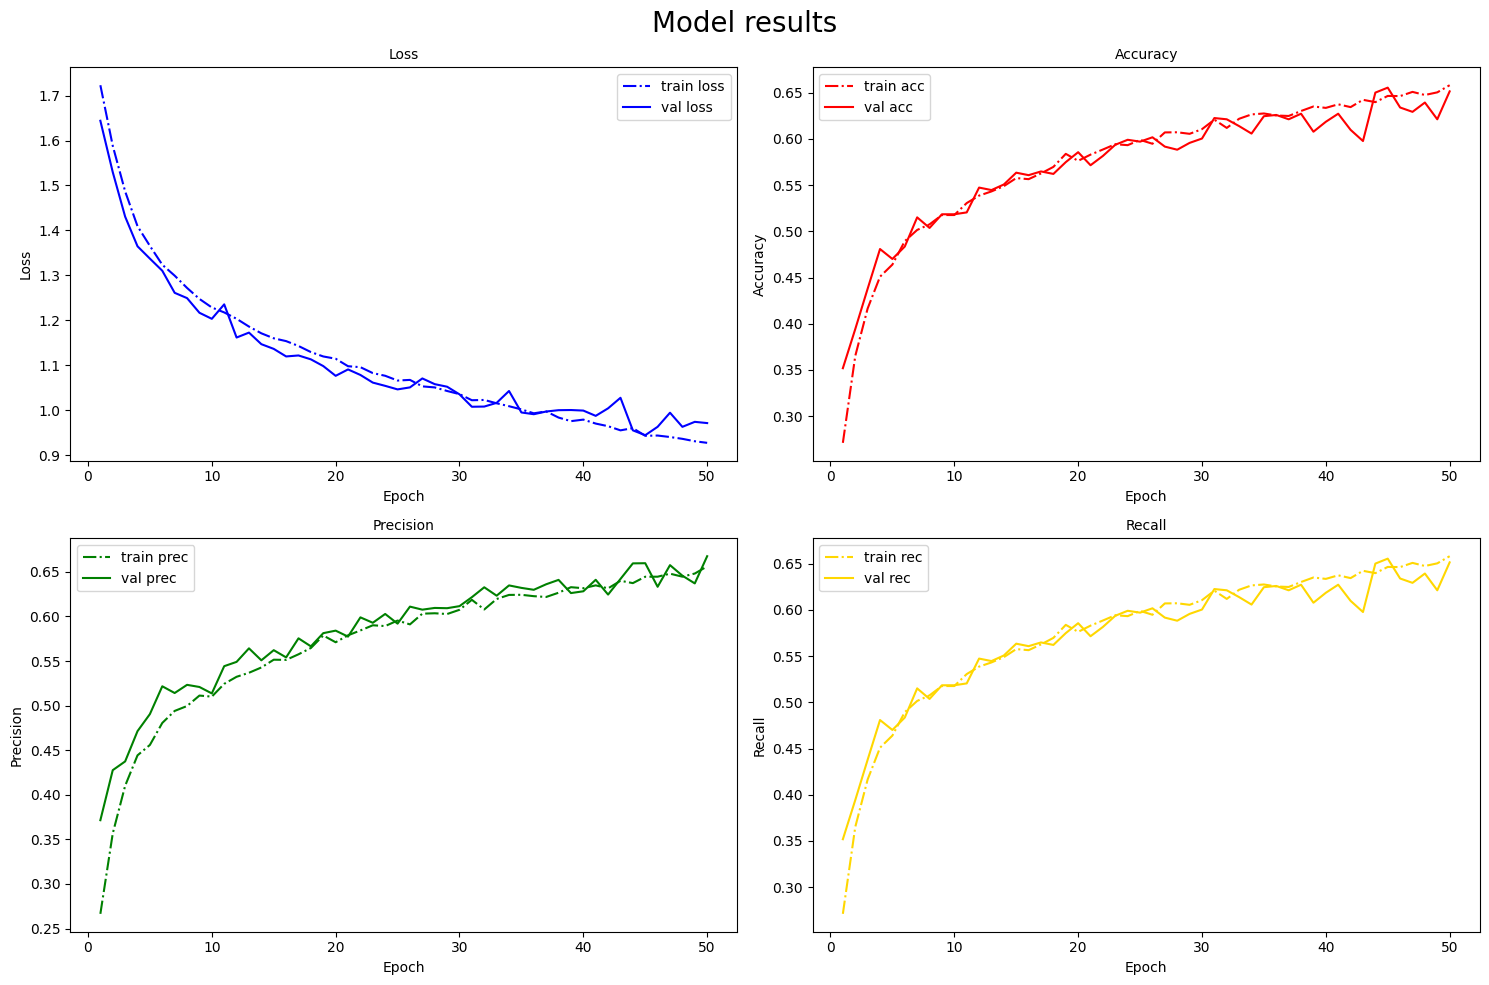

In [7]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

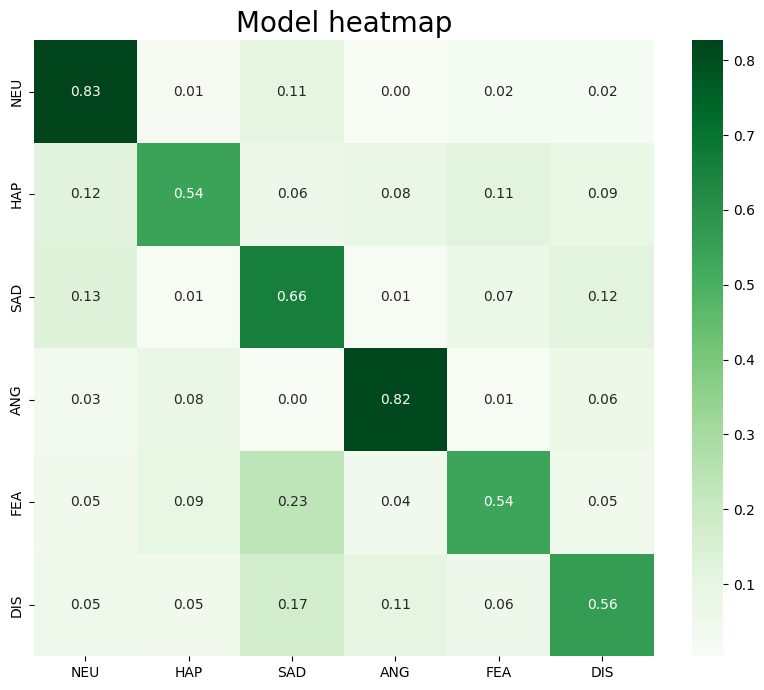

In [8]:
plot_confusion_matrix(cm)